<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/6__deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train_shape (60000, 28, 28)
y_train_shape (60000,)
x_test_shape (10000, 28, 28)
y_test_shape (10000,)
X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)
Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)
Y Training matrix shape (60000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8802 - loss: 0.4129
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9735 - loss: 0.0894
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9681 - loss: 0.0949
Test score(loss): 0.08316627889871597
Test accuracy(accuracy): 0.9722999930381775
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

predicted_classes= [7 2 1 ... 4 5 6]


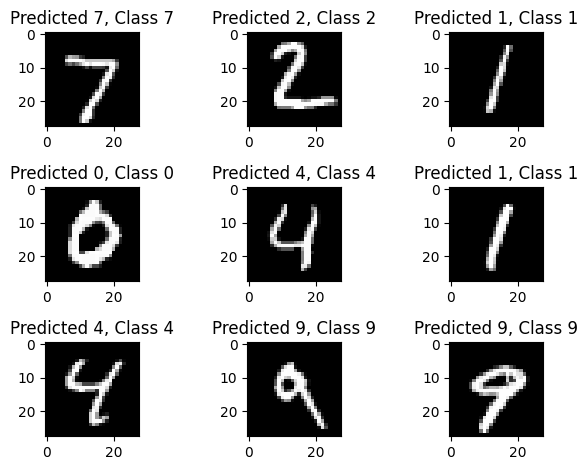

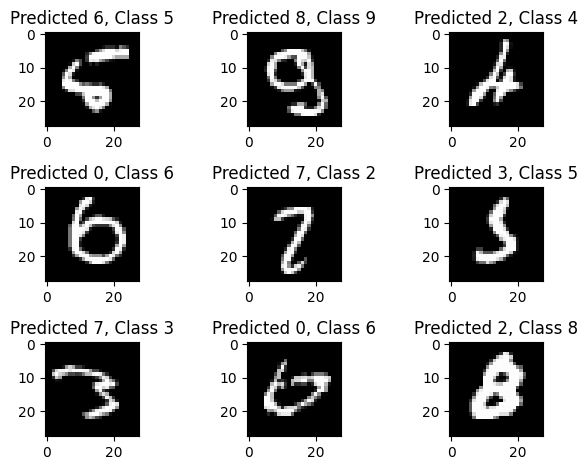

In [ ]:
# https://velog.io/@jjaa9292/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A53.-%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train_shape', x_train.shape)
print('y_train_shape', y_train.shape)
print('x_test_shape', x_test.shape)
print('y_test_shape', y_test.shape)

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

"""
to_categorical: Keras의 유틸리티 함수로, 정수 레이블을 원-핫 인코딩 형태로 변환합니다.
원-핫 인코딩은 각 클래스를 이진 벡터로 표현하는 방법입니다.
예를 들어, 클래스 0은 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 클래스 1은 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]와 같이 표현됩니다.
"""
Y_train = to_categorical(y_train, 10)
print("Y Training matrix shape", Y_train.shape)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=2, verbose=1) #epochs 값을 1부터 증가하면서 보면 Incorrect_indices가 줄어드는 것을 알수있음

score = model.evaluate(X_test, Y_test)
print('Test score(loss):', score[0])
print('Test accuracy(accuracy):', score[1])

"""
- predicted_classes == y_test는 두 배열을 비교하여 요소별로 True 또는 False를 반환합니다. True는 예측이 실제 값과 일치할 때 나타납니다.
- np.nonzero(...)는 배열에서 True인 요소의 인덱스를 반환합니다.
- [0]는 이 결과에서 첫 번째 차원에 해당하는 인덱스 값들만 선택합니다
"""
predicted_classes = np.argmax(model.predict(X_test), axis=1)
print("\npredicted_classes=", predicted_classes)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

#print(incorrect_indices)

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()



In [ ]:
import numpy as np

predicted_classes = np.array([1, 2, 1, 0, 2])
y_test = np.array([1, 0, 1, 0, 1])

# 예측과 실제 값이 일치하는 인덱스 찾기
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print(correct_indices)


[0 2 3]
